# **UNIVERSIDAD TORCUATO DI TELLA**
## **MAESTRÍA EN ECONOMETRÍA**

---

### **EXAMEN FINAL DE MICROECONOMETRÍA**

- **Profesor:** González-Rozada, Martín  
- **Ayudante:** Maiorano, Romina  
- **Alumno:** Guzzi, David Alexander  (Legajo n°: 24H1970, DNI: 37.703.649)  

**Ciclo Lectivo:** Tercer Trimestre, 2024  

---

In [59]:
# Importación de librerías.
import pandas as pd
import numpy as np
import pyreadstat as st
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t, norm
import warnings
from statsmodels.base.model import GenericLikelihoodModel
from statsmodels.discrete.discrete_model import Logit, Probit
from scipy.special import erf

# Semilla para la generación de números aleatorios.
np.random.seed(3649)

# Configuración de pandas (4 decimales y visualización de todas las columnas).
pd.set_option("display.float_format", "{:.4f}".format)
pd.set_option('display.max_columns', None)

#### **IMPORTACIÓN Y LECTURA DE DATOS.**

In [60]:
# Lectura y visualización del dataset.
path = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\DiTella\MEC\Materias\2024\2024 3T\[MT06] Microeconometría I\Trabajo final\CreditoHipotecario.dta"

df, meta = st.read_dta(path)
df.head(1)

,seq,s3,s4,s5,s6,s7,s9,s11,s13,s14,s15,s16,s17,s18,s19a,s19b,s19c,s19d,s20,s23a,s24a,s25a,s26a,s27a,s30a,s30c,s31a,s31c,s32,s33,s34,s35,s39,s40,s41,s42,s43,s44,s45,s46,s47,s48,s49,s50,s51,s52,s53,s54,s55,s56,s57,netw,uria,rtdum,bd,mi,old,vr,school,chval,dnotown,dprop,deny,pi_ratio,black,hse_inc,loan_val,ccred,mcred,pubrec,denpmi,selfemp,married,single,hischl,probunmp,condo
0,2.0000,1.0000,1.0000,1.0000,88.0000,1.0000,1120.0000,0.0000,5.0000,5.0000,2.0000,1.0000,53.0000,8.0000,NA,NA,NA,NA,1.0000,M,0.0000,19.0000,19.0000,0.0000,1938.0000,2000.0000,2241.0000,2000.0000,939.0000,110.0000,0.0000,30.0000,0.0000,0.0000,34.0000,2.0000,5.0000,0.0000,22.1000,22.1000,3.0000,360.0000,NA,110.0000,2.0000,0.0000,0.0000,N,0.0000,1.0000,999999.3750,92.0000,3.9000,0.0000,1.0000,1.0000,1.0000,0.0000,15.0000,206.7355,0.0000,0.0000,0.0000,0.2210,0.0000,0.2210,0.8000,5.0000,2.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,3.9000,0.0000


In [61]:
# Breve descipción del dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380 entries, 0 to 2379
Data columns (total 77 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   seq       2380 non-null   float64
 1   s3        2380 non-null   float64
 2   s4        2380 non-null   float64
 3   s5        2380 non-null   float64
 4   s6        2380 non-null   float64
 5   s7        2380 non-null   float64
 6   s9        2380 non-null   float64
 7   s11       2380 non-null   float64
 8   s13       2380 non-null   float64
 9   s14       2379 non-null   float64
 10  s15       2380 non-null   float64
 11  s16       2379 non-null   float64
 12  s17       2380 non-null   float64
 13  s18       2265 non-null   float64
 14  s19a      2380 non-null   object 
 15  s19b      2380 non-null   object 
 16  s19c      2380 non-null   object 
 17  s19d      2380 non-null   object 
 18  s20       2380 non-null   float64
 19  s23a      2380 non-null   object 
 20  s24a      2380 non-null   floa

#### **EJERCICIO 1.**
En este ejercicio se va a examinar **si la raza es un factor a la hora de rechazar una solicitud de crédito hipotecario**; la variable dependiente binaria vale uno si se rechaza una solicitud de crédito. Los datos fueron por investigadores del Banco de la Reserva Federal de Chicago y se relacionan con solicitudes de hipotecas presentadas en el área metropolitana de Chicago, en 1995. Durante el período cubierto por estos datos, la decisión de aprobar una solicitud de crédito normalmente la tomaba un oficial del banco. El oficial debe evaluar si el solicitante realizará los pagos del préstamo. Un dato importante es el tamaño de los pagos requeridos del créedito en relación con los ingresos del solicitante. Como sabe cualquiera que haya pedido dinero prestado, es mucho más fácil realizar pagos que representen el 10% de sus ingresos que el 50%. Por lo tanto, comenzaremos analizando la relación entre dos variables: la v**ariable dependiente binaria deny**, que es igual a 1 si la solicitud de créedito fue rechazada y es igual a 0 si fue aceptada, y la **variable continua pi_ratio**, que es la relación entre los pagos mensuales totales previstos del crédito del solicitante y sus ingresos mensuales. La base de datos es: CreditoHipotecario.dta.

**Se presentan una función y una clase que se utilizarán en el apartado 1:**
- **Función ols_estimation:** realiza estimación OLS;
- **Clase LogitProbit_estimation:** realiza estimación Logit y Probit.

**Observación:** en la mayoría de los casos, se prescinde del uso de librerías como *statsmodels*, que incluyen implementaciones de OLS, Logit y Probit, con el fin de aplicar las ecuaciones vistas en clase, lo que aporta mayor claridad. Para operaciones matriciales, se utiliza la librería *numpy*. Para el desarrollo de la clase **LogitProbit_estimation**, se utilizó la clase GenericLikelihoodModel de *statsmodels*, con el objetivo de utilizar métodos de optimización eficientes y confiables en la estimación de los parámetros de la log-verosimilitud definida. Se ha contrastado que **todos los resultados sean consistentes con los obtenidos en Stata**. 

In [62]:
def ols_estimation(y: pd.Series, x: pd.DataFrame, add_intercept: bool = True) -> pd.DataFrame:
    
    """
    Estima un modelo OLS.
    
    Parámetros
    -----------
    x : pd.DataFrame
        DataFrame de variables independientes.
    y : pd.Series o np.ndarray
        Serie o vector de la variable dependiente.
    add_intercept : bool, opcional
        Si es True, se agrega una columna de unos para el intercepto. Por defecto es True.
    
    Retorna
    -------
    pd.DataFrame
        DataFrame con las siguientes columnas:
        - Variable: Nombre de la variable independiente.
        - Coeficiente: Estimación del coeficiente OLS.
        - Error estándar: Error estándar del coeficiente.
        - t-valor: Estadístico t de la estimación.
        - p-valor: p-valor asociado al coeficiente.
        - Límite inferior: Límite inferior del intervalo de confianza.
        - Límite superior: Límite superior del intervalo de confianza.
    """
    if isinstance(x, pd.DataFrame):
        variable_names = x.columns.tolist()
        x = x.values
    else:
        variable_names = [f"x{i+1}" for i in range(x.shape[1])]
    
    if isinstance(y, pd.Series):
        y = y.values
    
    if add_intercept:
        X = np.column_stack((np.ones(len(x)), x))
        variable_names = ["_const"] + variable_names
    else:
        X = x
    
    obs, col = X.shape
    
    # Estimación de coeficientes.
    beta_coef = np.linalg.inv(X.T @ X) @ X.T @ y
    
    # Estimación del error cuadrático medio de los residuos.
    residuals = y - X @ beta_coef
    s2 = (residuals.T @ residuals) / (obs - col)
    
    # Matriz de varianzas y covarianzas.
    beta_var = s2 * np.linalg.inv(X.T @ X)
    
    # Errores estándar.
    beta_std = np.sqrt(np.diag(beta_var))
    
    # Valores t.
    t_values = beta_coef / beta_std
    
    # p-values.
    p_values = 2 * (1 - t.cdf(np.abs(t_values), df=obs-col))
    
    # Intervalos de confianza.
    alpha = 0.05
    t_crit = t.ppf(1 - alpha/2, df=obs-col)
    lower_interval = beta_coef - t_crit * beta_std
    upper_interval = beta_coef + t_crit * beta_std
    
    # Construcción del DataFrame.
    results_df = pd.DataFrame({
        'independent_variable': variable_names,
        'coefficients': beta_coef,
        'standard_errors': beta_std,
        't_value': t_values,
        'p_value': p_values,
        'lower_interval': lower_interval,
        'upper_interval': upper_interval
    })
    
    return results_df

In [97]:
class LogitProbit_estimation(GenericLikelihoodModel):
    
    """
    Modelo de regresión binaria basado en máxima verosimilitud para Logit y Probit.
    Se basa en la clase `GenericLikelihoodModel` de `statsmodels` que permite obtener estimaciones 
    mediante máxima verosimilitud, luego de determinar la correspondiente log-verosimilitud.

    Parámetros
    ----------
    endog : array-like
        Variable dependiente binaria (0 o 1).
    exog : array-like
        Matriz de variables explicativas (incluyendo la constante si es necesario).
    model_type : str, opcional
        Tipo de modelo a estimar: "logit" o "probit". Por defecto, "logit".
    **kwargs : dict, opcional
        Argumentos adicionales para `GenericLikelihoodModel`.

    Métodos
    -------
    loglike(params)
        Calcula la función de log-verosimilitud del modelo.
    
    fit(start_params=None, disp=0, **kwargs)
        Ajusta el modelo mediante máxima verosimilitud.

    marginal_effects(at="mean", column_names=None)
        Calcula los efectos marginales de las variables independientes:
            - "mean": evaluado en la media de las variables.
            - "average": promedio de los efectos marginales individuales.

    summary_custom(column_names=None)
        Genera un resumen de los coeficientes estimados, errores estándar y otros 
        estadísticos relevantes.
    """
    
    def __init__(self, endog, exog, model_type="logit", add_intercept=True, **kwargs):
        if add_intercept:
            exog = np.column_stack((np.ones(len(exog)), exog))
        
        super().__init__(endog, exog, **kwargs)
        
        if model_type not in ["logit", "probit"]:
            raise ValueError("El parámetro 'model_type' debe ser 'logit' o 'probit'")
        self.model_type = model_type
    
    def loglike(self, params):
        exog = self.exog
        endog = self.endog
        linear_pred = np.dot(exog, params)

        if self.model_type == "logit":
            p = 1 / (1 + np.exp(-linear_pred))
        elif self.model_type == "probit":
            p = 0.5 * (1 + erf(linear_pred / np.sqrt(2)))

        # Asegurar que p no sea 0 ni 1.
        p = np.clip(p, 1e-10, 1 - 1e-10)
        
        return (endog * np.log(p) + (1 - endog) * np.log(1 - p)).sum()
    
    def fit(self, start_params=None, disp=0, **kwargs):
        warnings.filterwarnings('ignore', category=UserWarning)
        
        if self.model_type == "logit":
            init_model = Logit(self.endog, self.exog).fit(disp=0)
        else:
            init_model = Probit(self.endog, self.exog).fit(disp=0)

        self.results = super().fit(start_params=init_model.params, disp=disp, **kwargs)
        self.params = self.results.params  
        
        return self.results
    
    def predict(self, params=None, exog=None):
        if params is None:
            params = self.params 
        if exog is None:
            exog = self.exog

        linear_pred = np.dot(exog, params)

        if self.model_type == "logit":
            pred = 1 / (1 + np.exp(-linear_pred))
        elif self.model_type == "probit":
            pred = 0.5 * (1 + erf(linear_pred / np.sqrt(2)))

        return pred

    def marginal_effects(self, column_names=None):
        params = self.params
        exog = self.exog
        linear_pred = np.dot(exog, params)

        if self.model_type == "logit":
            density = np.exp(-linear_pred) / (1 + np.exp(-linear_pred))**2
        elif self.model_type == "probit":
            density = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * linear_pred**2)

        x_mean = np.mean(exog, axis=0)
        mean_pred = np.dot(x_mean, params)
        
        if self.model_type == "logit":
            mean_p = 1 / (1 + np.exp(-mean_pred))
            mean_marginal_effect = mean_p * (1 - mean_p) * params
        elif self.model_type == "probit":
            mean_p = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * mean_pred**2)
            mean_marginal_effect = mean_p * params

        avg_marginal_effect = np.mean(density, axis=0) * params

        # Asignar nombres a las variables independientes
        if column_names is None:
            column_names = [f'Variable {i}' for i in range(1, exog.shape[1])]

        marginal_effects_list = [
            {"independent_variable": column_names[i - 1], "mean_marginal_effect": mean_marginal_effect[i], 'avg_marginal_effect': avg_marginal_effect[i]}
            for i in range(1, exog.shape[1])
        ]
        
        return pd.DataFrame(marginal_effects_list)
    
    def summary_custom(self, column_names=None):
        params = self.params
        std_errors = self.results.bse

        if column_names is None:
            column_names = [f'Variable {i}' for i in range(self.exog.shape[1])]
        else:
            column_names = ['_const'] + list(column_names)

        z_values = params / std_errors
        p_values = 2 * (1 - norm.cdf(np.abs(z_values)))
        ci = 1.96 * std_errors
        lower_interval = params - ci
        upper_interval = params + ci

        results_df = pd.DataFrame({
            'independent_variable': column_names,
            'coefficients': params,
            'standard_errors': std_errors,
            'z_value': z_values,
            'p_value': p_values,
            'lower_interval': lower_interval,
            'upper_interval': upper_interval
        })

        return results_df

**Ejercicios:**

**1.1.** Presente un diagrama de dispersión (*scatterplot*) de deny contra pi_ratio junto con la línea de regresión muestral y describa lo que observa. ¿Es razonable la estimación?

**1.2.** Estime la relación de la figura anterior por MCC e interprete sus resultados.

**1.3.** Para capturar el efecto de la raza sobre la probabilidad de que la solicitud del crédito sea rechazada, agregue como variable explicativa black. Interorete el coeficiente estimado sobre esta variable.

**1.4.** Repita el punto 1. pero con la estimación de un modelo Logit y un modelo Probit.

**1.5.** Presente el resultado de la estimación por Logot y Probit del punto anterior, calcule los efectos marginales e interprételos. ¿Qué cambia con respecto a su interpretación en 1.1.?

**1.6.** Repita el punto 1.3. pero ahora estime el modelo usando un Logit y un Probit. Interprete sus resultados.

**1.7.** Compara los resultados de las tres estimaciones: MCC, Logit y Probit.

**1.8.** Estime por Logit y Probit un modelo más completo que use como variables explicativas (además de las del punto 1.6.): hse_inc, loan_val, ccred, mcred, pubrec, denpmi, selfemp, married, single, hischl. probunmp y condo. Interprete todos los resultados.

**Ejercicio 1.1.**

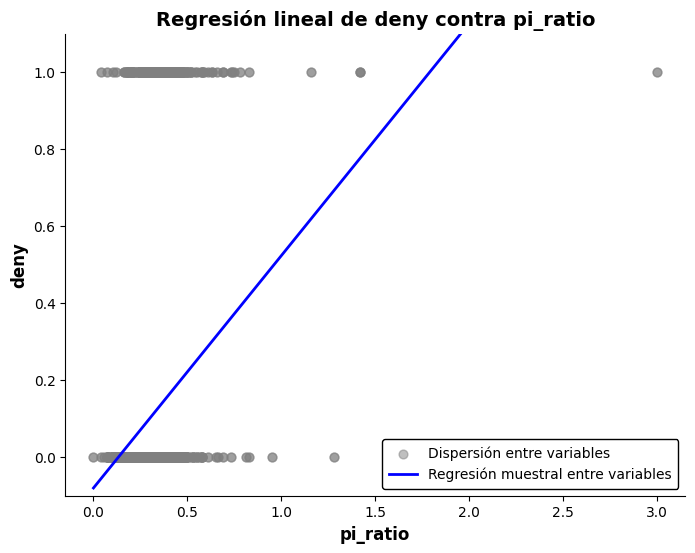

In [ ]:
# Se define estructura.
fig, ax = plt.subplots(figsize=(8, 6))

# Gráfico de dispersión con línea de regresión.
sns.regplot(
    x='pi_ratio', y='deny', data=df, ci=None, 
    scatter_kws={'alpha': 0.5, 's': 40, 'color': 'gray'}, 
    line_kws={'color': 'blue', 'linewidth': 2}, 
    ax=ax
)

# Personalización.
ax.set_xlabel('pi_ratio', fontsize=12, fontweight='bold', color='black')
ax.set_ylabel('deny', fontsize=12, fontweight='bold', color='black')
ax.set_title('Regresión lineal de deny contra pi_ratio', fontsize=14, fontweight='bold', color='black')

# Limitar el eje Y.
ax.set_ylim(-0.1, 1.1)

# Eliminar bordes superiores y derechos.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Leyenda.
scatter_legend = ax.scatter(df['pi_ratio'], df['deny'], alpha=0.5, s=40, color='gray', label="Dispersión entre variables")
line_legend, = ax.plot([], [], color='blue', linewidth=2, label="Regresión muestral entre variables")  
ax.legend(
    loc='lower right',  
    fontsize=10, 
    frameon=True,  
    facecolor='white',  
    edgecolor='black',  
    framealpha=1,
    borderpad=0.5
)
plt.show()

**Ejercicio 1.2.**

In [68]:
# Se definen variables.
x1 = df[['pi_ratio']]
y = df['deny']

In [67]:
ols_results = ols_estimation(y, x1)
ols_results

,independent_variable,coefficients,standard_errors,t_value,p_value,lower_interval,upper_interval
0,_const,-0.0799,0.0212,-3.7768,0.0002,-0.1214,-0.0384
1,pi_ratio,0.6035,0.0608,9.9200,0.0000,0.4842,0.7228


**Ejercicio 1.3.**

In [70]:
# Se definen variables.
x2 = df[['pi_ratio', 'black']]

In [71]:
ols_results2 = ols_estimation(y, x2)
ols_results2

,independent_variable,coefficients,standard_errors,t_value,p_value,lower_interval,upper_interval
0,_const,-0.0905,0.0208,-4.3542,0.0000,-0.1313,-0.0497
1,pi_ratio,0.5592,0.0599,9.3403,0.0000,0.4418,0.6766
2,black,0.1774,0.0184,9.6589,0.0000,0.1414,0.2134


**Ejercicios 1.4. y 1.5.**

In [98]:
# Se presenta un modelo Logit.
model_logit = LogitProbit_estimation(y, x1)
result_logit = model_logit.fit()
model_logit.summary_custom(column_names=x1.columns)

,independent_variable,coefficients,standard_errors,z_value,p_value,lower_interval,upper_interval
0,_const,-4.0284,0.2686,-14.9992,0.0000,-4.5548,-3.5020
1,pi_ratio,5.8845,0.7336,8.0214,0.0000,4.4466,7.3224


In [99]:
model_logit.marginal_effects(column_names=x1.columns)

,independent_variable,mean_marginal_effect,avg_marginal_effect
0,pi_ratio,0.5801,0.5907


In [101]:
# Se presenta un modelo Probit.
model_probit = LogitProbit_estimation(y, x1, model_type='probit')
result_probit = model_probit.fit()
model_probit.summary_custom(column_names=x1.columns)

,independent_variable,coefficients,standard_errors,z_value,p_value,lower_interval,upper_interval
0,_const,-2.1942,0.1290,-17.0103,0.0000,-2.4470,-1.9413
1,pi_ratio,2.9679,0.3591,8.2647,0.0000,2.2641,3.6718


In [104]:
model_probit.marginal_effects(column_names=x1.columns)

,independent_variable,mean_marginal_effect,avg_marginal_effect
0,pi_ratio,0.5678,0.5665


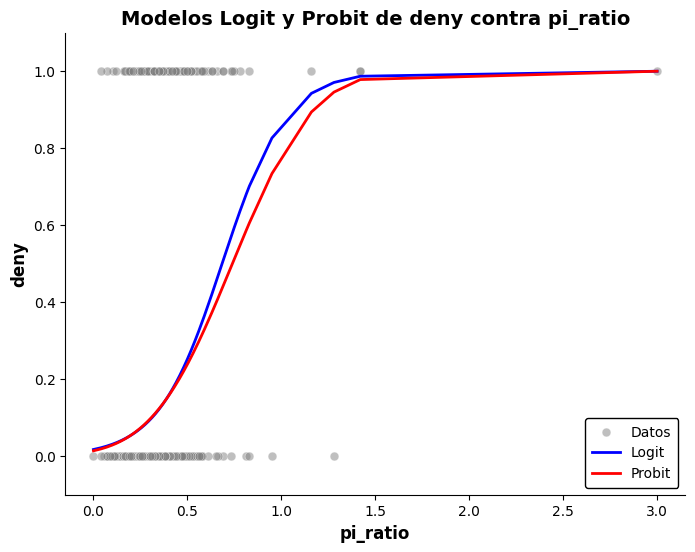

In [103]:
# Definir valores de pi_ratio ordenados para la curva.
pi_ratio_sorted = np.sort(df['pi_ratio'])
X_sorted = np.column_stack((np.ones(len(pi_ratio_sorted)), pi_ratio_sorted))

# Obtener predicciones de los modelos.
pred_logit = result_logit.predict(X_sorted)
pred_probit = result_probit.predict(X_sorted)

# Se define estructura.
fig, ax = plt.subplots(figsize=(8, 6))

# Gráfico de dispersión.
sns.scatterplot(
    x=df['pi_ratio'], y=df['deny'], alpha=0.5, s=40, color='gray', ax=ax, label="Datos"
)

# Curvas ajustadas.
ax.plot(pi_ratio_sorted, pred_logit, color='blue', linewidth=2, label="Logit")
ax.plot(pi_ratio_sorted, pred_probit, color='red', linewidth=2, label="Probit")

# Personalización.
ax.set_xlabel('pi_ratio', fontsize=12, fontweight='bold', color='black')
ax.set_ylabel('deny', fontsize=12, fontweight='bold', color='black')
ax.set_title('Modelos Logit y Probit de deny contra pi_ratio', fontsize=14, fontweight='bold', color='black')

# Limitar el eje Y.
ax.set_ylim(-0.1, 1.1)

# Eliminar bordes superiores y derechos.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Leyenda.
ax.legend(
    loc='lower right',  
    fontsize=10, 
    frameon=True,  
    facecolor='white',  
    edgecolor='black',  
    framealpha=1,
    borderpad=0.5
)

# Guardar en alta resolución para publicación.
plt.savefig("logit_probit_regresion.png", dpi=300, bbox_inches='tight')

plt.show()

**Ejercicio 1.6.**

In [106]:
model_logit2 = LogitProbit_estimation(y, x2)
result_logit2 = model_logit2.fit()
model_logit2.summary_custom(column_names=x2.columns)

,independent_variable,coefficients,standard_errors,z_value,p_value,lower_interval,upper_interval
0,_const,-4.1256,0.2684,-15.3700,0.0000,-4.6517,-3.5995
1,pi_ratio,5.3704,0.7283,7.3736,0.0000,3.9429,6.7979
2,black,1.2728,0.1462,8.7059,0.0000,0.9862,1.5593


In [107]:
model_logit2.marginal_effects(column_names=x2.columns)

,independent_variable,mean_marginal_effect,avg_marginal_effect
0,pi_ratio,0.4949,0.5183
1,black,0.1173,0.1228


In [108]:
model_probit2 = LogitProbit_estimation(y, x2, model_type='probit')
result_probit2 = model_probit2.fit()
model_probit2.summary_custom(column_names=x2.columns)

,independent_variable,coefficients,standard_errors,z_value,p_value,lower_interval,upper_interval
0,_const,-2.2587,0.1299,-17.3907,0.0000,-2.5133,-2.0042
1,pi_ratio,2.7416,0.3596,7.6244,0.0000,2.0368,3.4464
2,black,0.7082,0.0834,8.4878,0.0000,0.5446,0.8717


In [109]:
model_probit2.marginal_effects(column_names=x2.columns)

,independent_variable,mean_marginal_effect,avg_marginal_effect
0,pi_ratio,0.5002,0.5014
1,black,0.1292,0.1295


In [50]:
x = df[['pi_ratio', 'black', 'hse_inc', 'loan_val', 'ccred', 'mcred', 'pubrec', 'denpmi', 'selfemp', 'single', 'hischl', 'probunmp', 'condo']]
X = np.column_stack((np.ones(len(x)), x))
y = df['deny']
model_logit3 = LogitProbit_estimation(y, X)
result_logit3 = model_logit3.fit()
model_logit3.summary_custom(column_names=x.columns)

,independent_variable,coefficients,standard_errors,z_value,p_value,lower_interval,upper_interval
0,_const,-6.0466,0.6965,-8.6813,0.0000,-7.4118,-4.6815
1,pi_ratio,4.7984,1.0350,4.6363,0.0000,2.7699,6.8269
2,black,0.7037,0.1804,3.9008,0.0001,0.3501,1.0572
3,hse_inc,-0.4828,1.2370,-0.3903,0.6963,-2.9074,1.9417
4,loan_val,1.8039,0.4989,3.6160,0.0003,0.8261,2.7817
5,ccred,0.2964,0.0398,7.4402,0.0000,0.2183,0.3745
6,mcred,0.2417,0.1430,1.6901,0.0910,-0.0386,0.5220
7,pubrec,1.2313,0.2048,6.0127,0.0000,0.8299,1.6327
8,denpmi,4.5449,0.5544,8.1979,0.0000,3.4583,5.6315
9,selfemp,0.6471,0.2126,3.0439,0.0023,0.2304,1.0638


In [51]:
model_logit3.marginal_effects(column_names=x.columns)

,independent_variable,marginal_effect
0,pi_ratio,0.3288
1,black,0.0482
2,hse_inc,-0.0331
3,loan_val,0.1236
4,ccred,0.0203
5,mcred,0.0166
6,pubrec,0.0844
7,denpmi,0.3114
8,selfemp,0.0443
9,single,0.0308


In [52]:
model_logit3.marginal_effects(column_names=x.columns, at='average')

,independent_variable,marginal_effect
0,pi_ratio,0.3610
1,black,0.0529
2,hse_inc,-0.0363
3,loan_val,0.1357
4,ccred,0.0223
5,mcred,0.0182
6,pubrec,0.0926
7,denpmi,0.3419
8,selfemp,0.0487
9,single,0.0338


In [54]:
model_probit3 = LogitProbit_estimation(y, X, model_type='probit')
result_probit3 = model_probit3.fit()
model_probit3.summary_custom(column_names=x.columns)

,independent_variable,coefficients,standard_errors,z_value,p_value,lower_interval,upper_interval
0,_const,-3.1017,0.3635,-8.5333,0.0000,-3.8142,-2.3893
1,pi_ratio,2.5009,0.5304,4.7149,0.0000,1.4612,3.5405
2,black,0.3957,0.0988,4.0043,0.0001,0.2020,0.5894
3,hse_inc,-0.3766,0.6548,-0.5752,0.5651,-1.6600,0.9067
4,loan_val,0.7872,0.2430,3.2396,0.0012,0.3109,1.2635
5,ccred,0.1575,0.0216,7.3048,0.0000,0.1153,0.1998
6,mcred,0.1224,0.0750,1.6313,0.1028,-0.0247,0.2695
7,pubrec,0.7059,0.1190,5.9327,0.0000,0.4727,0.9391
8,denpmi,2.5668,0.2838,9.0449,0.0000,2.0106,3.1231
9,selfemp,0.3412,0.1124,3.0348,0.0024,0.1208,0.5616


In [55]:
model_probit3.marginal_effects(column_names=x.columns)

,independent_variable,marginal_effect
0,pi_ratio,0.3697
1,black,0.0585
2,hse_inc,-0.0557
3,loan_val,0.1164
4,ccred,0.0233
5,mcred,0.0181
6,pubrec,0.1043
7,denpmi,0.3794
8,selfemp,0.0504
9,single,0.0363


In [56]:
model_probit3.marginal_effects(column_names=x.columns, at='average')

,independent_variable,marginal_effect
0,pi_ratio,0.3622
1,black,0.0573
2,hse_inc,-0.0545
3,loan_val,0.1140
4,ccred,0.0228
5,mcred,0.0177
6,pubrec,0.1022
7,denpmi,0.3718
8,selfemp,0.0494
9,single,0.0356


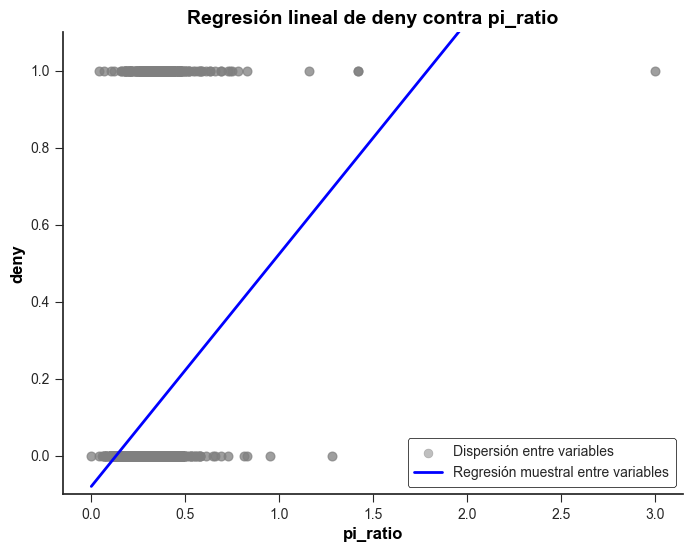

In [38]:
# Se define estructura.
fig, ax = plt.subplots(figsize=(8, 6))

# Gráfico de dispersión con línea de regresión.
sns.regplot(
    x='pi_ratio', y='deny', data=df, ci=None, 
    scatter_kws={'alpha': 0.5, 's': 40, 'color': 'gray'}, 
    line_kws={'color': 'blue', 'linewidth': 2}, 
    ax=ax
)

# Personalización.
ax.set_xlabel('pi_ratio', fontsize=12, fontweight='bold', color='black')
ax.set_ylabel('deny', fontsize=12, fontweight='bold', color='black')
ax.set_title('Regresión lineal de deny contra pi_ratio', fontsize=14, fontweight='bold', color='black')

# Limitar el eje Y.
ax.set_ylim(-0.1, 1.1)

# Eliminar bordes superiores y derechos.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Leyenda.
scatter_legend = ax.scatter(df['pi_ratio'], df['deny'], alpha=0.5, s=40, color='gray', label="Dispersión entre variables")
line_legend, = ax.plot([], [], color='blue', linewidth=2, label="Regresión muestral entre variables")  
ax.legend(
    loc='lower right',  
    fontsize=10, 
    frameon=True,  
    facecolor='white',  
    edgecolor='black',  
    framealpha=1,
    borderpad=0.5
)

# Guardar en alta resolución para publicación.
plt.savefig("regresion_cientifico.png", dpi=300, bbox_inches='tight')

plt.show()

Si el modelo es una regresión lineal (OLS) y deny es binaria (0 o 1), el uso de este modelo no es ideal porque:

Puede predecir probabilidades fuera del rango [0,1]
No modela correctamente relaciones no lineales entre la variable independiente y la probabilidad de aprobación.

In [241]:
import warnings
from statsmodels.base.model import GenericLikelihoodModel
import numpy as np
from scipy.stats import logistic, norm

class MyLogit(GenericLikelihoodModel):
    def loglike(self, params):
        exog = self.exog
        endog = self.endog
        linear_pred = np.dot(exog, params)
        p = 1 / (1 + np.exp(-linear_pred))
        return (endog * np.log(p) + (1 - endog) * np.log(1 - p)).sum()

    def fit(self, start_params=None, disp=0, **kwargs):
        # Suprimir los warnings
        warnings.filterwarnings('ignore', category=UserWarning)
        
        result = super().fit(start_params=start_params, disp=disp, **kwargs)
        self.params = result.params  # Guardamos los parámetros ajustados
        return result

    def marginal_effects(self, at="mean", column_names=None):
        params = self.params
        exog = self.exog
        linear_pred = np.dot(exog, params)

        # Iniciar una lista para almacenar los efectos marginales
        marginal_effects_list = []

        # Usar los nombres de las columnas proporcionados
        if column_names is None:
            column_names = [f'Variable {i}' for i in range(1, exog.shape[1])]

        if at == "mean":
            x_mean = np.mean(exog, axis=0)
            mean_pred = np.dot(x_mean, params)
            mean_p = 1 / (1 + np.exp(-mean_pred))
            marginal_effect = mean_p * (1 - mean_p) * params

            # Crear un DataFrame con las variables independientes y sus efectos marginales
            for i in range(1, exog.shape[1]):  # excluyendo _const
                marginal_effects_list.append({
                    'independent_variable': column_names[i-1],
                    'marginal_effect': marginal_effect[i]
                })

        elif at == "average":
            logistic_density = (np.exp(-linear_pred) / (1 + np.exp(-linear_pred))**2)
            marginal_effects_vector = np.mean(logistic_density, axis=0)

            # Crear un DataFrame con las variables independientes y sus efectos marginales
            for i in range(1, exog.shape[1]):  # excluyendo _const
                marginal_effects_list.append({
                    'independent_variable': column_names[i-1],
                    'marginal_effect': marginal_effects_vector * params[i]
                })

        else:
            raise ValueError("El parámetro 'at' debe ser 'mean' o 'average'")

        # Convertir la lista a un DataFrame
        marginal_effects_df = pd.DataFrame(marginal_effects_list)

        return marginal_effects_df
    
    def summary_custom(self, column_names=None):
        # Extraer coeficientes, errores estándar, z_values y p_values
        params = self.params
        exog = self.exog

        # Usar los nombres de las columnas proporcionados
        if column_names is None:
            column_names = [f'Variable {i}' for i in range(exog.shape[1])]
        else:
            column_names = ['_const'] + list(column_names)

        # 1. Calcular la matriz de información de Fisher
        p_hat = 1 / (1 + np.exp(-np.dot(exog, params)))  # Probabilidades predichas
        diag_p_hat = p_hat * (1 - p_hat)  # Derivada de la función logística
        info_matrix = np.dot(exog.T * diag_p_hat, exog)

        # 2. Calcular la matriz de covarianza (inversa de la matriz de información de Fisher)
        cov_matrix = np.linalg.inv(info_matrix)

        # 3. Calcular los errores estándar
        std_errors = np.sqrt(np.diag(cov_matrix))

        # 4. Calcular los valores z y los p-valores
        z_values = params / std_errors
        p_values = 2 * (1 - norm.cdf(np.abs(z_values)))  # p-valor bilateral

        # 5. Calcular intervalos de confianza
        ci = 1.96 * std_errors
        lower_interval = params - ci
        upper_interval = params + ci

        # Construcción del DataFrame con los resultados
        results_df = pd.DataFrame({
            'independent_variable': column_names,
            'coefficients': params,
            'standard_errors': std_errors,
            'z_value': z_values,
            'p_value': p_values,
            'lower_interval': lower_interval,
            'upper_interval': upper_interval
        })

        return results_df

In [242]:
x = df[['pi_ratio', 'black']]
X = np.column_stack((np.ones(len(x)), x))
y = df['deny']
model = MyLogit(y, X)

# Ajuste del modelo, suprimiendo los mensajes de optimización y advertencias
result = model.fit()
model.summary_custom(column_names=x.columns)

,independent_variable,coefficients,standard_errors,z_value,p_value,lower_interval,upper_interval
0,_const,-4.1255,0.2684,-15.3700,0.0000,-4.6516,-3.5995
1,pi_ratio,5.3703,0.7283,7.3736,0.0000,3.9428,6.7978
2,black,1.2728,0.1462,8.7059,0.0000,0.9862,1.5593


In [ ]:
import warnings
from statsmodels.base.model import GenericLikelihoodModel
import numpy as np
from scipy.special import erf

class BinaryModel(GenericLikelihoodModel):
    def __init__(self, endog, exog, model_type="logit", **kwargs):
        super().__init__(endog, exog, **kwargs)
        if model_type not in ["logit", "probit"]:
            raise ValueError("El parámetro 'model_type' debe ser 'logit' o 'probit'")
        self.model_type = model_type  # Guardamos el tipo de modelo
    
    def loglike(self, params):
        exog = self.exog
        endog = self.endog
        linear_pred = np.dot(exog, params)

        if self.model_type == "logit":
            p = 1 / (1 + np.exp(-linear_pred))
        elif self.model_type == "probit":
            p = 0.5 * (1 + erf(linear_pred / np.sqrt(2)))
        
        return (endog * np.log(p) + (1 - endog) * np.log(1 - p)).sum()
    
    def fit(self, start_params=None, disp=0, **kwargs):
        warnings.filterwarnings('ignore', category=UserWarning)
        result = super().fit(start_params=start_params, disp=disp, **kwargs)
        self.params = result.params  
        return result

    def marginal_effects(self, at="mean", column_names=None):
        params = self.params
        exog = self.exog
        linear_pred = np.dot(exog, params)

        if self.model_type == "logit":
            density = np.exp(-linear_pred) / (1 + np.exp(-linear_pred))**2
        elif self.model_type == "probit":
            density = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * linear_pred**2)

        if at == "mean":
            x_mean = np.mean(exog, axis=0)
            mean_pred = np.dot(x_mean, params)
            
            if self.model_type == "logit":
                mean_p = 1 / (1 + np.exp(-mean_pred))
                marginal_effect = mean_p * (1 - mean_p) * params
            elif self.model_type == "probit":
                mean_p = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * mean_pred**2)
                marginal_effect = mean_p * params

        elif at == "average":
            marginal_effect = np.mean(density, axis=0) * params

        else:
            raise ValueError("El parámetro 'at' debe ser 'mean' o 'average'")

        # Asignar nombres a las variables independientes
        if column_names is None:
            column_names = [f'Variable {i}' for i in range(1, exog.shape[1])]

        marginal_effects_list = [
            {"independent_variable": column_names[i - 1], "marginal_effect": marginal_effect[i]}
            for i in range(1, exog.shape[1])
        ]
        
        return pd.DataFrame(marginal_effects_list)
    
    def summary_custom(self, column_names=None):
        params = self.params
        exog = self.exog

        if column_names is None:
            column_names = [f'Variable {i}' for i in range(exog.shape[1])]
        else:
            column_names = ['_const'] + list(column_names)

        linear_pred = np.dot(exog, params)

        if self.model_type == "logit":
            p_hat = 1 / (1 + np.exp(-linear_pred))
            diag_p_hat = p_hat * (1 - p_hat)
        elif self.model_type == "probit":
            p_hat = 0.5 * (1 + erf(linear_pred / np.sqrt(2)))  # CDF de la normal estándar
            phi_x = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * linear_pred**2)  # PDF de la normal estándar
            diag_p_hat = (phi_x**2) / (p_hat * (1 - p_hat))  # CORRECCIÓN: matriz de Fisher

        info_matrix = np.dot(exog.T * diag_p_hat, exog)
        cov_matrix = np.linalg.inv(info_matrix)
        std_errors = np.sqrt(np.diag(cov_matrix))
        z_values = params / std_errors
        p_values = 2 * (1 - 0.5 * (1 + erf(np.abs(z_values) / np.sqrt(2))))
        ci = 1.96 * std_errors
        lower_interval = params - ci
        upper_interval = params + ci

        results_df = pd.DataFrame({
            'independent_variable': column_names,
            'coefficients': params,
            'standard_errors': std_errors,
            'z_value': z_values,
            'p_value': p_values,
            'lower_interval': lower_interval,
            'upper_interval': upper_interval
        })

        return results_df

In [276]:
x = df[['pi_ratio', 'black']]
X = np.column_stack((np.ones(len(x)), x))
y = df['deny']
model_logit = BinaryModel(y, X, model_type="probit")
result_logit = model_logit.fit()
model_logit.summary_custom(column_names=x.columns)

,independent_variable,coefficients,standard_errors,z_value,p_value,lower_interval,upper_interval
0,_const,-2.2587,0.1367,-16.5222,0.0000,-2.5267,-1.9908
1,pi_ratio,2.7417,0.3805,7.2050,0.0000,1.9958,3.4875
2,black,0.7082,0.0834,8.4958,0.0000,0.5448,0.8715


In [272]:
import statsmodels.api as sm

probit_model = sm.Probit(y, X)
probit_fit = probit_model.fit()
print(probit_fit.summary())


Optimization terminated successfully.
         Current function value: 0.334931
         Iterations 6
                          Probit Regression Results                           
Dep. Variable:                   deny   No. Observations:                 2380
Model:                         Probit   Df Residuals:                     2377
Method:                           MLE   Df Model:                            2
Date:                Tue, 25 Feb 2025   Pseudo R-squ.:                 0.08594
Time:                        20:12:43   Log-Likelihood:                -797.14
converged:                       True   LL-Null:                       -872.09
Covariance Type:            nonrobust   LLR p-value:                 2.818e-33
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2587      0.130    -17.391      0.000      -2.513      -2.004
x1             2.7416      0.

In [ ]:
import warnings
from statsmodels.base.model import GenericLikelihoodModel
import numpy as np
from scipy.special import erf

class BinaryModel(GenericLikelihoodModel):
    def __init__(self, endog, exog, model_type="logit", **kwargs):
        super().__init__(endog, exog, **kwargs)
        if model_type not in ["logit", "probit"]:
            raise ValueError("El parámetro 'model_type' debe ser 'logit' o 'probit'")
        self.model_type = model_type  # Guardamos el tipo de modelo
    
    def loglike(self, params):
        exog = self.exog
        endog = self.endog
        linear_pred = np.dot(exog, params)

        if self.model_type == "logit":
            p = 1 / (1 + np.exp(-linear_pred))
        elif self.model_type == "probit":
            p = 0.5 * (1 + erf(linear_pred / np.sqrt(2)))
        
        return (endog * np.log(p) + (1 - endog) * np.log(1 - p)).sum()
    
    def fit(self, start_params=None, disp=0, **kwargs):
        warnings.filterwarnings('ignore', category=UserWarning)
        result = super().fit(start_params=start_params, disp=disp, **kwargs)
        self.params = result.params  
        return result

    def marginal_effects(self, at="mean", column_names=None):
        params = self.params
        exog = self.exog
        linear_pred = np.dot(exog, params)

        if self.model_type == "logit":
            density = np.exp(-linear_pred) / (1 + np.exp(-linear_pred))**2
        elif self.model_type == "probit":
            density = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * linear_pred**2)

        if at == "mean":
            x_mean = np.mean(exog, axis=0)
            mean_pred = np.dot(x_mean, params)
            
            if self.model_type == "logit":
                mean_p = 1 / (1 + np.exp(-mean_pred))
                marginal_effect = mean_p * (1 - mean_p) * params
            elif self.model_type == "probit":
                mean_p = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * mean_pred**2)
                marginal_effect = mean_p * params

        elif at == "average":
            marginal_effect = np.mean(density, axis=0) * params

        else:
            raise ValueError("El parámetro 'at' debe ser 'mean' o 'average'")

        # Asignar nombres a las variables independientes
        if column_names is None:
            column_names = [f'Variable {i}' for i in range(1, exog.shape[1])]

        marginal_effects_list = [
            {"independent_variable": column_names[i - 1], "marginal_effect": marginal_effect[i]}
            for i in range(1, exog.shape[1])
        ]
        
        return pd.DataFrame(marginal_effects_list)
    
    def summary_custom(self, column_names=None):
        params = self.params
        exog = self.exog

        if column_names is None:
            column_names = [f'Variable {i}' for i in range(exog.shape[1])]
        else:
            column_names = ['_const'] + list(column_names)

        linear_pred = np.dot(exog, params)

        if self.model_type == "logit":
            p_hat = 1 / (1 + np.exp(-linear_pred))
            diag_p_hat = p_hat * (1 - p_hat)
        elif self.model_type == "probit":
            p_hat = 0.5 * (1 + erf(linear_pred / np.sqrt(2)))  # CDF de la normal estándar
            phi_x = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * linear_pred**2)  # PDF de la normal estándar
            diag_p_hat = (phi_x**2) / (p_hat * (1 - p_hat))  # CORRECCIÓN: matriz de Fisher

        info_matrix = np.dot(exog.T * diag_p_hat, exog)
        cov_matrix = np.linalg.inv(info_matrix)
        std_errors = np.sqrt(np.diag(cov_matrix))
        z_values = params / std_errors
        p_values = 2 * (1 - 0.5 * (1 + erf(np.abs(z_values) / np.sqrt(2))))
        ci = 1.96 * std_errors
        lower_interval = params - ci
        upper_interval = params + ci

        results_df = pd.DataFrame({
            'independent_variable': column_names,
            'coefficients': params,
            'standard_errors': std_errors,
            'z_value': z_values,
            'p_value': p_values,
            'lower_interval': lower_interval,
            'upper_interval': upper_interval
        })

        return results_df

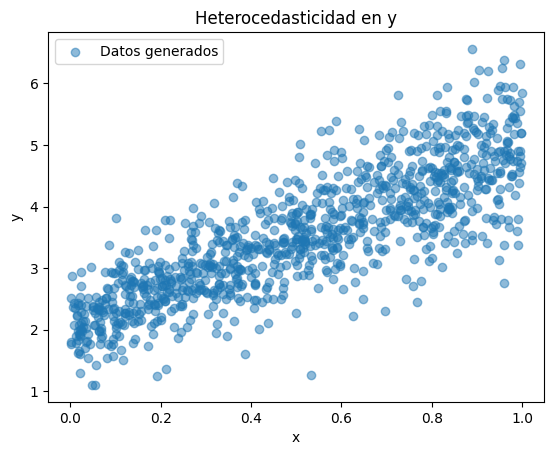

In [278]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
n = 1000  # Número de observaciones
beta_0 = 2  # Intercepto
beta_1 = 3  # Coeficiente de x
sigma2 = 0.5  # Escala para la heterocedasticidad
tau2 = 0.1  # Variabilidad en z

# Generar x ~ Uniform(0,1)
x = np.random.uniform(0, 1, size=n)

# Generar z = x + v, donde v ~ N(0, tau2)
v = np.random.normal(0, np.sqrt(tau2), size=n)
z = np.abs(x + v) + 0.1  # Asegurar que z > 0

# Generar u ~ N(0, sigma^2 * z)
u = np.random.normal(0, np.sqrt(sigma2 * z), size=n)

# Generar y
y = beta_0 + beta_1 * x + u

# Visualizar heterocedasticidad
plt.scatter(x, y, alpha=0.5, label="Datos generados")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Heterocedasticidad en y")
plt.legend()
plt.show()

In [47]:
x = df[['pi_ratio']]
X = np.column_stack((np.ones_like(x), x))
y = df['deny']
model = MyLogit(y, X)

# Ajuste del modelo, suprimiendo los mensajes de optimización y advertencias
result = model.fit()

# Llamar a la función marginal_effects
marginal_mean = model.marginal_effects(at="mean")  
marginal_avg = model.marginal_effects(at="average")

# Mostrar los resultados
print(marginal_mean)
print(marginal_avg)

[0.58013224]
0.5907368332403824


In [174]:
linear_pred = (X @ [-4.028432, 5.884498])
np.mean((np.exp(-linear_pred) / (1 + np.exp(-linear_pred))**2) * 5.884498)

0.5907418262577322

In [101]:
linear_pred.shape

(2380, 1)

In [109]:
(np.exp(-linear_pred) / (1 + np.exp(-linear_pred))**2)

array([[0.0575806 ],
       [0.07196435],
       [0.11831986],
       ...,
       [0.07019519],
       [0.09378735],
       [0.10750253]])

In [ ]:
np.mean((np.exp(-linear_pred) / (1 + np.exp(-linear_pred))**2) * x, axis=0).shape

(1, 2)

In [128]:
np.mean((np.exp(-linear_pred) / (1 + np.exp(-linear_pred))**2) * X, axis=0)

array([0.1003895, 0.0356711])

In [135]:
np.mean((np.exp(-linear_pred) / (1 + np.exp(-linear_pred))**2) * 5.884498)

0.5907418262577322

In [133]:
logistic.pdf(np.dot(X, [-4.028432, 5.884498])) * 5.884498

array([0.33883292, 0.42347404, 0.69625301, ..., 0.41306347, 0.5518915 ,
       0.63259843])

In [160]:
x_mean = np.mean(X, axis=0)
mean_pred = np.dot(x_mean, [-4.028432, 5.884498])
mean_p = 1 / (1 + np.exp(-mean_pred)).reshape(-1,1)
marginal_effect = mean_p * (1 - mean_p) * [-4.028432, 5.884498]
marginal_effect

array([[-0.39715274,  0.5801375 ]])

In [113]:
mean_pred

-2.081760223037674

In [42]:
alpha = -4.028432
beta = 5.884498

# Vector de valores de x
x = df[['pi_ratio']]
x_values = np.array(x)  # Reemplázalo con tu variable independiente

# Calcular la densidad logística en cada punto alpha + beta * x_i
logistic_density = logistic.pdf(alpha + beta * x_values)

# Promediar los efectos marginales
marginal_effect_avg = np.mean(logistic_density * beta)

print("Efecto marginal promedio:", marginal_effect_avg)

Efecto marginal promedio: 0.5907418262577322


In [23]:
import statsmodels.api as sm

x = df['pi_ratio']
X = sm.add_constant(x)
y = df['deny']

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   deny   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     98.41
Date:                Wed, 19 Feb 2025   Prob (F-statistic):           9.37e-23
Time:                        23:18:39   Log-Likelihood:                -651.42
No. Observations:                2380   AIC:                             1307.
Df Residuals:                    2378   BIC:                             1318.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0799      0.021     -3.777      0.000      -0.121      -0.038
pi_ratio       0.6035      0.061      9.920      0.000       0.484       0.723
==============================================================================
Omnibus:                     1018.085   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3273.764
Skew:                           2.280   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
x = df['pi_ratio']
X = np.stack([np.ones(x.shape[0]), x], axis=1)
y = df['deny']

beta = np.linalg.inv(X.T @ X) @ X.T @ y
beta

array([-0.07990964,  0.60353493])

In [25]:
x = df[['pi_ratio', 'black']]
X = sm.add_constant(x)
y = df['deny']

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   deny   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     97.76
Date:                Wed, 19 Feb 2025   Prob (F-statistic):           1.58e-41
Time:                        23:20:29   Log-Likelihood:                -605.61
No. Observations:                2380   AIC:                             1217.
Df Residuals:                    2377   BIC:                             1235.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0905      0.021     -4.354      0.000      -0.131      -0.050
pi_ratio       0.5592      0.060      9.340      0.000       0.442       0.677
black          0.1774      0.018      9.659      0.000       0.141       0.213
==============================================================================
Omnibus:                      969.841   Durbin-Watson:                   1.517
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3013.280
Skew:                           2.168   Prob(JB):                         0.00
Kurtosis:                       6.403   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

significa que, manteniendo pi_ratio constante:
Ser black (black = 1) aumenta la probabilidad de aprobación del crédito en aproximadamente 0.177 en comparación con no serlo (black = 0).
Es decir, en igualdad de condiciones en pi_ratio, las personas identificadas como black tienen una mayor probabilidad de que su crédito sea aprobado.

In [29]:
logit_model = sm.Logit(y, X).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.334326
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   deny   No. Observations:                 2380
Model:                          Logit   Df Residuals:                     2377
Method:                           MLE   Df Model:                            2
Date:                Wed, 19 Feb 2025   Pseudo R-squ.:                 0.08759
Time:                        23:25:42   Log-Likelihood:                -795.70
converged:                       True   LL-Null:                       -872.09
Covariance Type:            nonrobust   LLR p-value:                 6.671e-34
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.1256      0.268    -15.370      0.000      -4.652      -3.599
pi_ratio       5.3704      0.728      7.374      0.000       3.943       6.798
black          1.2728      0.146      8.706      0.000       0.986       1.559
==============================================================================
"""

In [31]:
# Calcular los efectos marginales (mfx en Stata)
logit_margins = logit_model.get_margeff(at='mean')

# Mostrar los resultados de los efectos marginales
print(logit_margins.summary())

        Logit Marginal Effects       
Dep. Variable:                   deny
Method:                          dydx
At:                              mean
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
pi_ratio       0.4949      0.066      7.465      0.000       0.365       0.625
black          0.1173      0.013      8.859      0.000       0.091       0.143


In [32]:
# Calcular los efectos marginales (mfx en Stata)
logit_margins = logit_model.get_margeff()

# Mostrar los resultados de los efectos marginales
print(logit_margins.summary())

        Logit Marginal Effects       
Dep. Variable:                   deny
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
pi_ratio       0.5183      0.070      7.430      0.000       0.382       0.655
black          0.1228      0.014      8.791      0.000       0.095       0.150


In [30]:
probit_model = sm.Probit(y, X).fit()
probit_model.summary()

Optimization terminated successfully.
         Current function value: 0.334931
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:                   deny   No. Observations:                 2380
Model:                         Probit   Df Residuals:                     2377
Method:                           MLE   Df Model:                            2
Date:                Wed, 19 Feb 2025   Pseudo R-squ.:                 0.08594
Time:                        23:25:59   Log-Likelihood:                -797.14
converged:                       True   LL-Null:                       -872.09
Covariance Type:            nonrobust   LLR p-value:                 2.818e-33
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2587      0.130    -17.391      0.000      -2.513      -2.004
pi_ratio       2.7416      0.360      7.624      0.000       2.037       3.446
black          0.7082      0.083      8.488      0.000       0.545       0.872
==============================================================================
"""

In [33]:
# Calcular los efectos marginales (mfx en Stata)
probit_margins = probit_model.get_margeff(at='mean')

# Mostrar los resultados de los efectos marginales
print(probit_margins.summary())

       Probit Marginal Effects       
Dep. Variable:                   deny
Method:                          dydx
At:                              mean
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
pi_ratio       0.5002      0.066      7.575      0.000       0.371       0.630
black          0.1292      0.015      8.465      0.000       0.099       0.159


Para una persona con un valor promedio de pi_ratio, el hecho de ser black aumenta la probabilidad de aprobación del crédito en aproximadamente 12.92 puntos porcentuales (0.1292) en comparación con no serlo, manteniendo constante el valor de pi_ratio.

Valor óptimo de k para que aproximadamente el 30% de y^* sea negativo: -0.4545454545454546


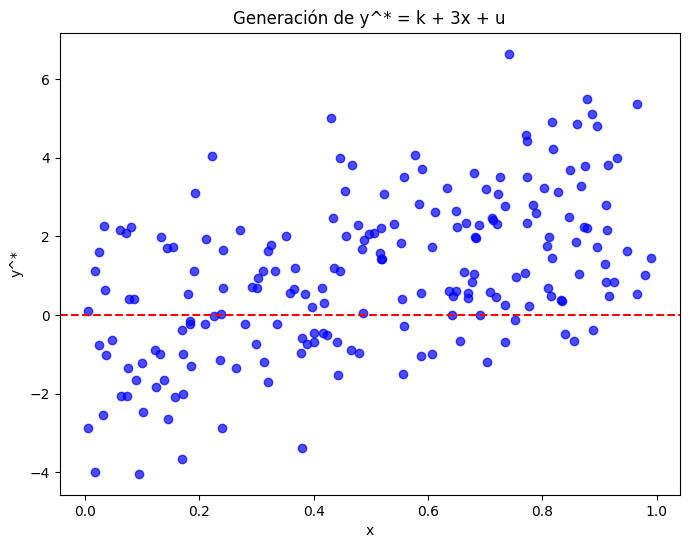

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Generar 200 valores de x uniformemente distribuidos entre 0 y 1
n = 200
x = np.random.uniform(0, 1, n)

# Generar 200 valores de u de distribución normal N(0, 3)
u = np.random.normal(0, np.sqrt(3), n)

# Función para calcular y^* dado k
def generate_y_star(k, x, u):
    return k + 3 * x + u

# Probar diferentes valores de k para que el 30% de y^* sea negativo
k_values = np.linspace(-3, 3, 100)  # Rango de posibles valores de k
neg_percentage = []

for k in k_values:
    y_star = generate_y_star(k, x, u)
    neg_percentage.append(np.mean(y_star < 0))  # Porcentaje de valores negativos

# Elegir el valor de k que da un 30% de valores negativos
k_optimal = k_values[np.argmin(np.abs(np.array(neg_percentage) - 0.30))]

# Generar y^* con el valor óptimo de k
y_star = generate_y_star(k_optimal, x, u)

# Mostrar el valor óptimo de k
print(f'Valor óptimo de k para que aproximadamente el 30% de y^* sea negativo: {k_optimal}')

# Graficar el resultado
plt.figure(figsize=(8, 6))
plt.scatter(x, y_star, color='blue', alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Generación de y^* = k + 3x + u')
plt.xlabel('x')
plt.ylabel('y^*')
plt.show()

El valor de k que genera aproximadamente un 30.0% de valores negativos en y es: -0.5


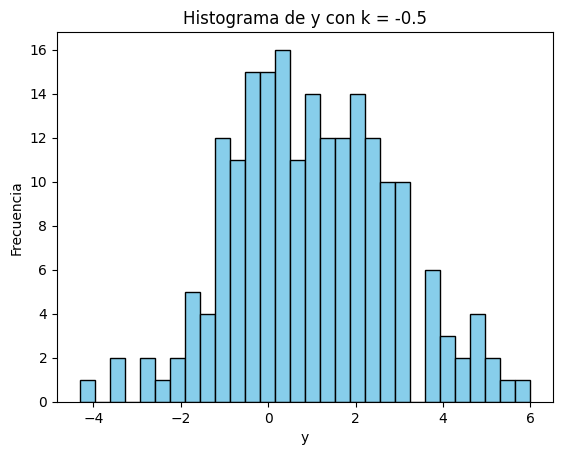

array([ 0.12195391, -1.64575223,  1.5252616 ,  2.08387583,  0.05019749,
       -0.06772919,  0.63585543, -0.12318898,  3.02082952,  4.91590334,
       -0.12031285,  2.10065108,  1.63855245,  2.81386196,  1.15646867,
        0.34167135, -0.43895794,  2.93364406,  1.44222797,  1.46099425,
        1.8355464 , -1.39025406,  2.27170094,  3.15823665,  3.59624253,
        1.95180645,  5.14086276,  3.92874819,  1.01301674,  1.5138254 ,
        3.09910494,  1.12216851,  4.72460655, -0.1592865 , -0.93335339,
       -0.98975601, -2.81085098,  1.5582093 ,  2.04277714, -1.14082625,
        1.76614824, -0.03604518,  1.91285848,  3.24419134, -0.80302327,
        3.97292249,  1.48873587, -2.06720715,  0.07720141, -0.9837874 ,
       -1.04284622,  2.99330378,  2.62126791,  2.54152451,  1.97354006,
        0.96918689,  1.66814017,  3.73360566, -0.56299861,  0.16500025,
       -0.96295842,  1.30486758,  2.02825476,  0.10699391, -0.44365197,
       -0.68896884, -3.39433932, -0.21643481,  0.80794219,  2.98

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_latent_variable(n=200, target_negative_proportion=0.30):
    k = 0  # Iniciar con un valor de k
    negative_proportion = 1.0  # Valor inicial para la proporción de valores negativos

    while abs(negative_proportion - target_negative_proportion) > 0.01:  # Condición de ajuste
        # Generar las variables
        x = np.random.uniform(0, 1, n)  # x ~ uniform[0, 1]
        u = np.random.normal(0, np.sqrt(3), n)  # u ~ N(0, 3)

        # Calcular y
        y = k + 3 * x + u
        
        # Proporción de y negativos
        negative_proportion = np.sum(y < 0) / n

        # Ajustar k según la proporción de negativos
        k -= 0.1  # Ajustar k en cada iteración (puedes hacer más fino el paso)

    print(f"El valor de k que genera aproximadamente un {target_negative_proportion*100}% de valores negativos en y es: {k}")

    # Mostrar histograma
    plt.hist(y, bins=30, color='skyblue', edgecolor='black')
    plt.title(f"Histograma de y con k = {k}")
    plt.xlabel('y')
    plt.ylabel('Frecuencia')
    plt.show()

    return y

# Llamar a la función
generate_latent_variable()

In [2]:
import numpy as np
import pandas as pd

def generate_latent_variable_df(n=2000, target_negative_proportion=0.30):
    k = 0  # Iniciar con un valor de k
    negative_proportion = 1.0  # Valor inicial para la proporción de valores negativos

    while abs(negative_proportion - target_negative_proportion) > 0.0001:  # Condición de ajuste
        # Generar las variables
        x = np.random.uniform(0, 1, n)  # x ~ uniform[0, 1]
        u = np.random.normal(0, np.sqrt(3), n)  # u ~ N(0, 3)

        # Calcular y
        y = k + 3 * x + u
        
        # Proporción de y negativos
        negative_proportion = np.sum(y < 0) / n

        # Ajustar k según la proporción de negativos
        k -= 0.1  # Ajustar k en cada iteración (puedes hacer más fino el paso)

    # Crear el DataFrame
    df = pd.DataFrame({
        'num_obs': np.arange(1, n + 1),
        'y': y,
        'k': k,
        'x': x,
        'u': u
    })

    df_t = df[df['y']>=0].copy()

    return df, df_t

# Llamar a la función y generar el DataFrame
df, df_t = generate_latent_variable_df()
df.head()

KeyboardInterrupt: 

In [16]:
df[df['y']<0].shape[0] / len(df)

0.292

In [17]:
df_t.head()

,num_obs,y,k,x,u
0,1,-1.763746,-0.5,0.169144,-1.871177
1,2,-2.010542,-0.5,0.072198,-1.827134
7,8,-0.350803,-0.5,0.258369,-0.725910
11,12,-1.760940,-0.5,0.200830,-1.963431
12,13,-1.350461,-0.5,0.007219,-0.972120


In [19]:
df[df['y']<0].shape[0]

584

In [18]:
df_t.shape[0]

584